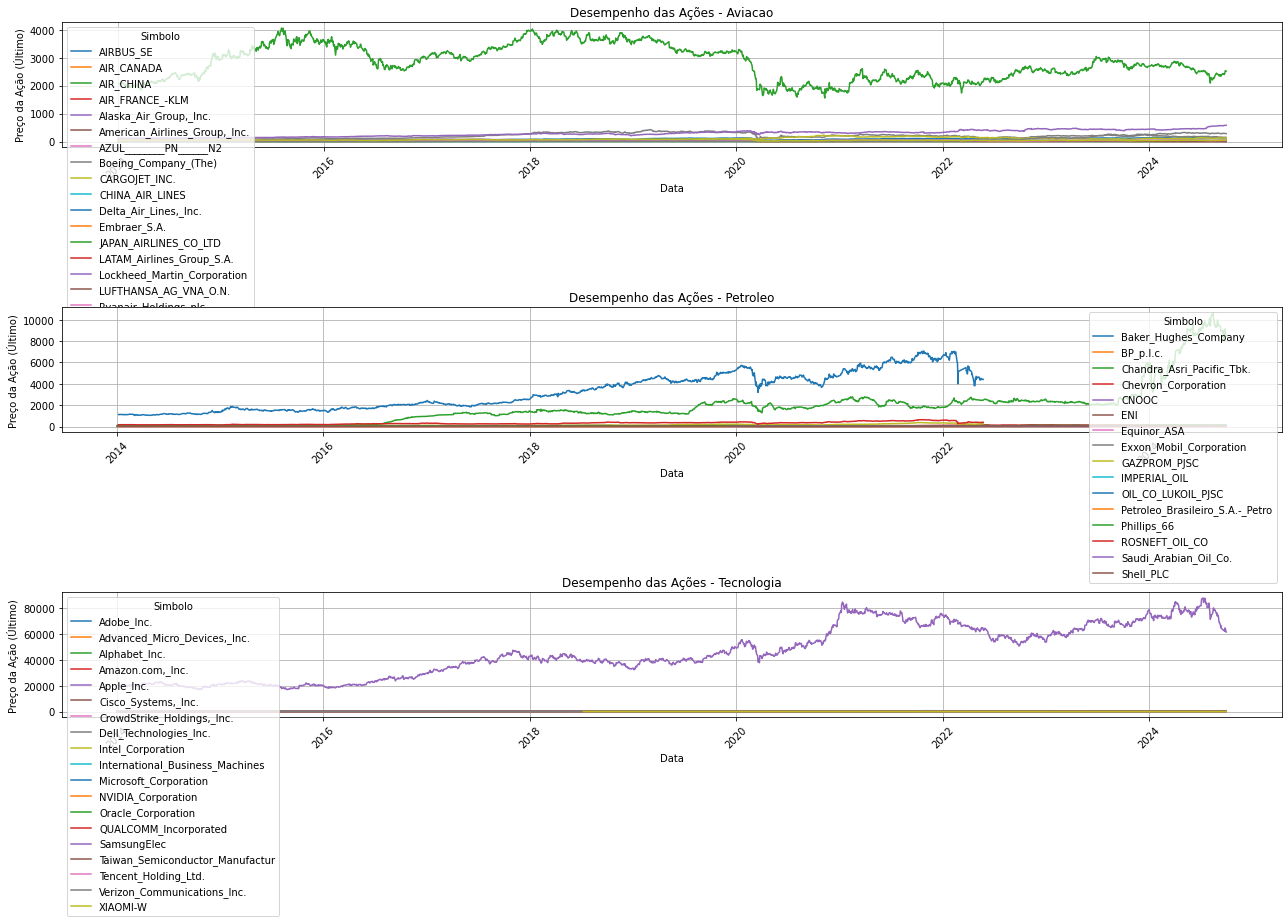

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_graficos_acoes():
    # Caminho do arquivo concatenado
    csv_file = r'C:\Users\23024522\Desktop\teste\Dados\concatenado.csv'
    
    # Ler o CSV concatenado
    df = pd.read_csv(csv_file)
    
    # Converter a coluna 'Data' para o formato datetime
    df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')

    # Listar os ramos de interesse
    ramos = ['Aviacao', 'Petroleo', 'Tecnologia']
    
    # Criar uma figura para os gráficos
    plt.figure(figsize=(18, 12))

    # Loop através dos ramos e plotar os gráficos de linha
    for i, ramo in enumerate(ramos, 1):
        # Filtrar o DataFrame para o ramo atual
        df_ramo = df[df['Ramo'] == ramo]
        
        # Criar gráfico para o ramo atual
        plt.subplot(3, 1, i)
        for simbolo in df_ramo['Simbolo'].unique():
            dados_empresa = df_ramo[df_ramo['Simbolo'] == simbolo]
            plt.plot(dados_empresa['Data'], dados_empresa['Ultimo'], label=simbolo)
        
        # Configurações do gráfico
        plt.title(f'Desempenho das Ações - {ramo}')
        plt.xlabel('Data')
        plt.ylabel('Preço da Ação (Último)')
        plt.xticks(rotation=45)
        plt.legend(title='Simbolo')
        plt.grid()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Executar a função
plotar_graficos_acoes()
